Find dataset: https://www.kaggle.com/datasets/joebeachcapital/life-longevity-factors/data

In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
with open('../../LongevityFactors/LiveLongerData.csv') as f:
    reader = csv.reader(f)
    
    for row in reader:
        print(row)

['Factor', 'Years gained / lost', 'strength of science?', 'strength of science as a number', 'sexes affected', 'effect', 'Comment', 'Note', 'ID', 'Sources', 'Links']
['Smoking', '-10', 'strong', '3', 'Both', 'negative', '10 years gained (against those who continue to smoke) if you quit smoking between the ages of 25 and 24; 5 years gained if you quit smoking between the ages of 45 and 59', '14 if combined with exercise and eating healthy; HOWEVER those who quit smoking before they turn 35 can gain most if not all of that decade back, and even those who wait until middle age to kick the habit can add about five years back to their life expectancies.', '1', 'Khaw KT, et al. (2008). Combined impact of health behaviours and mortality in men and women: the EPIC Norfolk prospective population study. PLoS Medicine 5(1), 39–47.', 'http://www.washingtonpost.com/wp-dyn/articles/A61981-2004Jun22.html']
['Sitting Down', '-3', 'suggestive', '1', 'Both', 'negative', 'for 8-11 hours sitting a day', '

In [4]:
data = pd.read_csv('../../LongevityFactors/LiveLongerData.csv')
print(data.head(5))

              Factor  Years gained / lost strength of science?  \
0            Smoking                -10.0               strong   
1       Sitting Down                 -3.0           suggestive   
2  Too much sleeping                 -1.5           suggestive   
3      More Optimism                  2.0           suggestive   
4          More Pets                  3.0                 good   

   strength of science as a number sexes affected    effect  \
0                                3           Both  negative   
1                                1           Both  negative   
2                                1           Both  negative   
3                                1         Female  positive   
4                                2           Both  positive   

                                             Comment  \
0  10 years gained (against those who continue to...   
1                       for 8-11 hours sitting a day   
2          7 hours ideal, no more than 8 hrs a night   


## Filter the dataset to only include rows where the effect is positive

In [5]:
positive_effect_data = data[data['effect'] == 'positive']

## Sort the results by the 'Years gained / lost' column in descending order

In [6]:
positive_effect_data_sorted = positive_effect_data.sort_values(by='Years gained / lost', ascending=False)

In [7]:
positive_effect_data_sorted[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']]

,Factor,Years gained / lost,strength of science?,sexes affected
19,Spending more time with women,15.00,suggestive,male
20,Avoid Cancer,15.00,suggestive,Both
18,"a lifestyle of non-smoking, exercising, and he...",14.00,strong,Both
17,Avoid heart disease,13.00,suggestive,Both
16,More Meditation,12.00,suggestive,Both
15,Less Food,11.67,suggestive,Both
14,Good marriage,10.00,good,Both
31,Polygamy,9.30,suggestive,Male
30,Country living,8.00,suggestive,Both
26,More Money,7.50,good,Both


## Let's do some vizualization

In [8]:
import plotly.express as px

In [9]:
# Select the top 10 Factor that increase the lifespan

top_factors = positive_effect_data_sorted.head(10)

## Create the bar chart

In [ ]:
fig_bar = px.bar(
    top_factors,
    x = 'Years gained / lost',
    y = 'Factor',
    title = 'Top 10 Factors that Increase the Lifespan',
    labels= {'Years gained / lost' : 'Years Gained', 'Factor' : 'Factor'},
    orientation = 'h',
    color = 'strength of science?'
)

fig_bar.show()

## Create a Pie chart

In [18]:
fig_pie = px.pie(
    positive_effect_data_sorted,
    names = 'Factor',
    values = 'Years gained / lost',
    color = 'strength of science?',
    title = 'Distribution of Factor that Increase the lifepan by Strength of science',
    hole = 0.35
)

fig_pie.show()

In [24]:
# Enhance the pie chart by adding labels and updating the colors
fig_pie.update_traces(
    textinfo='percent+label',
    pull=[0.1, 0.1, 0.1],
    marker=dict(colors=['#ff9999','#66b3ff','#99ff99'])
)
fig_pie.update_layout(
    title='Distribution of Factors that Increase Lifespan by Strength of Science',
    template='plotly_dark'
)

fig_pie.show()

In [22]:
# Create the bubble chart using absolute values for the size
fig_bubble = px.scatter(
    positive_effect_data_sorted,
    x='Factor',
    y='sexes affected',
    size=abs(positive_effect_data_sorted['Years gained / lost']),
    color='strength of science?',
    title='Factors that Increase Lifespan',
    labels={'Years gained / lost': 'Years Gained', 'Factor': 'Factor', 'sexes affected': 'Sexes Affected'},
    size_max=60,
    template='plotly',
)

# Customize the figure
fig_bubble.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig_bubble.update_layout(showlegend=True, height=600, width=1000)

# Show the figure
fig_bubble.show()

In [25]:
# Analyze the top factors that increase lifespan for each sex
top_factors_by_sex = positive_effect_data_sorted.groupby('sexes affected').apply(lambda x: x.nlargest(5, 'Years gained / lost')).reset_index(drop=True)

# Display the top factors by sex
top_factors_by_sex[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']]

C:\Users\snehp\AppData\Local\Temp\ipykernel_28500\1314861111.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Factor,Years gained / lost,strength of science?,sexes affected
0,Avoid Cancer,15.00,suggestive,Both
1,"a lifestyle of non-smoking, exercising, and he...",14.00,strong,Both
2,Avoid heart disease,13.00,suggestive,Both
3,More Meditation,12.00,suggestive,Both
4,Less Food,11.67,suggestive,Both
5,Greater Faith (churchgoing),7.00,suggestive,Both but especially for women
6,Living at high altitude,2.00,strong,"Both, but esp. for men"
7,being a woman,5.10,good,Female
8,More Optimism,2.00,suggestive,Female
9,Polygamy,9.30,suggestive,Male


In [26]:
# Analyze the factors with strong scientific evidence versus those with only suggestive or good evidence
strong_evidence = positive_effect_data_sorted[positive_effect_data_sorted['strength of science?'] == 'strong']
suggestive_good_evidence = positive_effect_data_sorted[positive_effect_data_sorted['strength of science?'] != 'strong']

# Display the factors with strong, suggestive, and good evidence
strong_evidence[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']], suggestive_good_evidence[['Factor', 'Years gained / lost', 'strength of science?', 'sexes affected']]

(                                               Factor  Years gained / lost  \
 18  a lifestyle of non-smoking, exercising, and he...                 14.0   
 6                                      Healthy Eating                  7.0   
 32                                      Good genetics                  5.0   
 34                                        Pets - dogs                  3.0   
 13                            Living at high altitude                  2.0   
 21                                      More Exercise                  2.0   
 33                                  A little exercise                  2.0   
 10                                     Mental Illness                -25.0   
 
    strength of science?          sexes affected  
 18               strong                    Both  
 6                strong                    Both  
 32               strong                    Both  
 34               strong                    Both  
 13               strong  Both, 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\snehp\AppData\Local\Temp\ipykernel_28500\4275624552.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\snehp\AppData\Local\Temp\ipykernel_28500\4275624552.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\snehp\AppData\Local\Temp\ipykernel_28500\4275624552.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\snehp\AppData\Local\Temp\ipykernel_28500\4275624552.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same ef

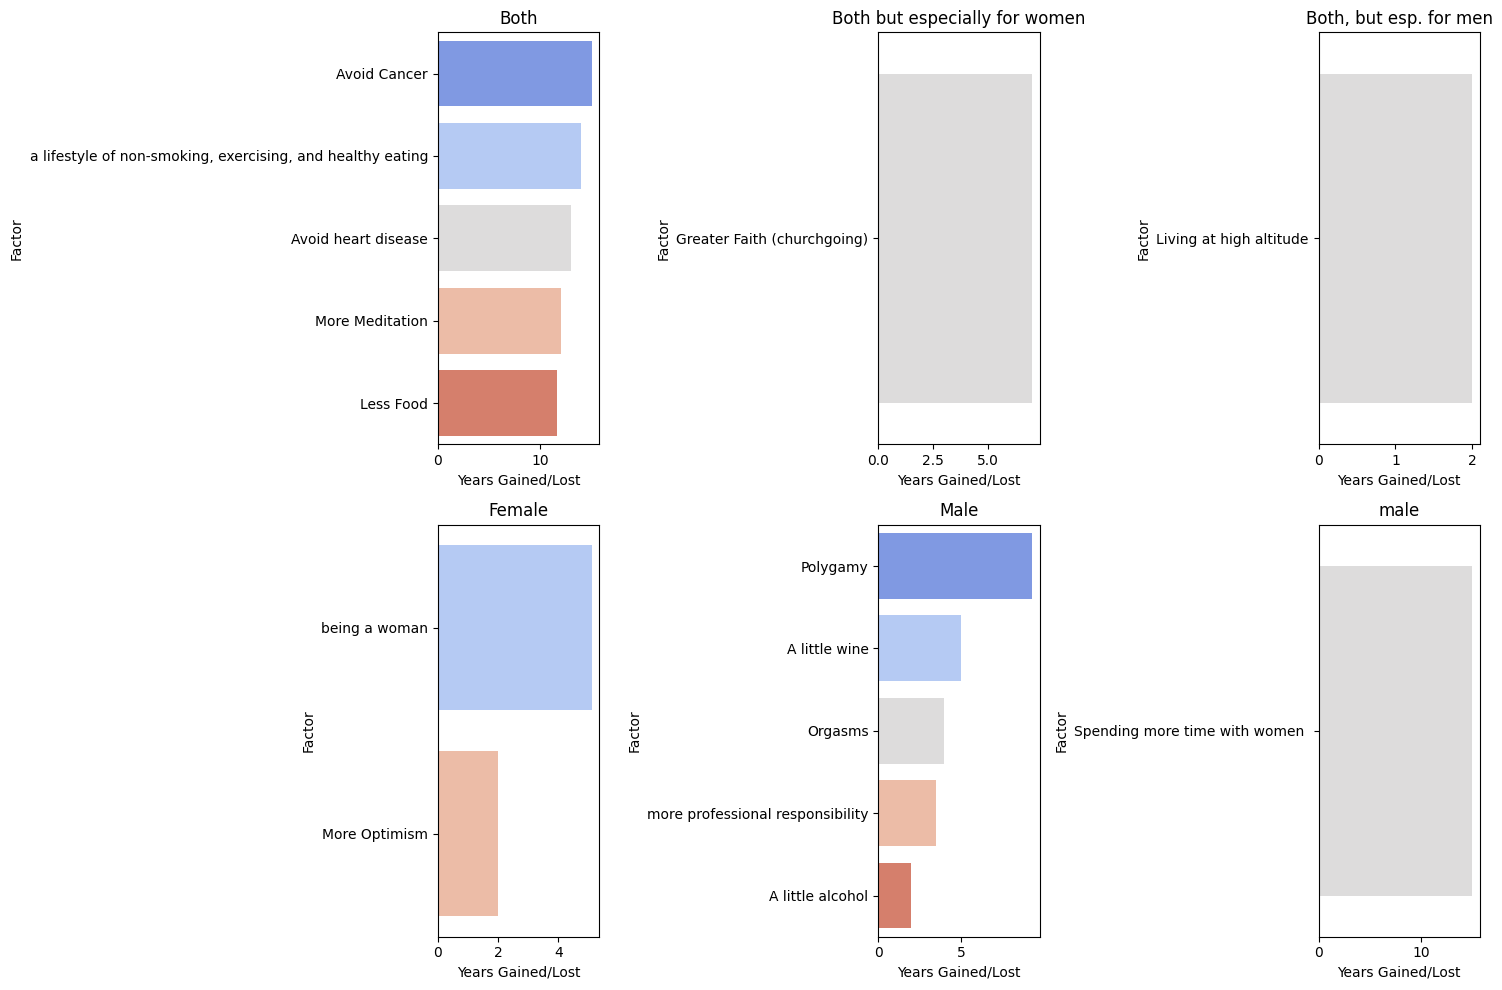

In [30]:
# Create a bar plot of the top 5 factors for each sex
top_factors_by_sex_grouped = top_factors_by_sex.groupby('sexes affected')

# Create subplots for each sex
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (sex, group) in enumerate(top_factors_by_sex_grouped):
    ax = axes.flatten()[i]
    sns.barplot(x='Years gained / lost', y='Factor', data=group, ax=ax, palette='coolwarm')
    ax.set_title(sex)
    ax.set_xlabel('Years Gained/Lost')
    ax.set_ylabel('Factor')

plt.tight_layout()
plt.show()